# MAZ176 statistics

Author: Arne Neumann

Date: 2014-10-13

In [33]:
%matplotlib inline

import os
from collections import Counter
from operator import itemgetter

import pandas as pd
from networkx import Graph
from networkx.algorithms.components.connected import connected_components
from discoursegraphs import select_edges_by, get_pointing_chains
from discoursegraphs.readwrite import ConanoDocumentGraph, MMAXDocumentGraph, RSTGraph, TigerDocumentGraph

MAZ_ROOTDIR = os.path.expanduser('~/repos/pcc-annis-merged/maz176/')

# Number of Connectors

In [34]:
CONANO_DIR = os.path.join(MAZ_ROOTDIR, 'connectors')
conano_files = !ls $CONANO_DIR/*.xml

## Number of Connectors by Connector Type

In [35]:
all_connectors = Counter()

for conano_file in conano_files:
    cdg = ConanoDocumentGraph(conano_file)
    for token_id in cdg.tokens:
        if 'conano:connective' in cdg.node[token_id]['layers']:
            all_connectors[cdg.node[token_id]['relation']] += 1

In [36]:
connector_counts = sorted(all_connectors.iteritems(), key=itemgetter(1), reverse=True)
connector_df = pd.DataFrame(connector_counts, columns=['connectors', 'counts'])
connector_df

,connectors,counts
0,addition,365
1,consequence,200
2,concession,175
3,contrast,171
4,condition,105
5,successive,52
6,alternation,35
7,purpose,23
8,simultaneous,21
9,temporal,10


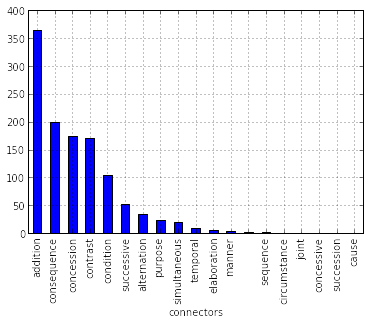

In [37]:
connector_df.plot(kind='bar', x='connectors', y='counts')

## Number of Connectors by Connector Token

In [38]:
connector_tokens = Counter()

for conano_file in conano_files:
    cdg = ConanoDocumentGraph(conano_file)
    for token_id in cdg.tokens:
        if 'conano:connective' in cdg.node[token_id]['layers']:
            # count tokens normalized to lower case
            connector_tokens[cdg.get_token(token_id).lower()] += 1

In [39]:
connector_token_counts = sorted(connector_tokens.iteritems(), key=itemgetter(1), reverse=True)
connector_token_df = pd.DataFrame(connector_token_counts, columns=['connectors', 'counts'])
connector_token_df

,connectors,counts
0,und,248
1,wenn,93
2,aber,89
3,doch,87
4,denn,51
5,auch,41
6,dann,40
7,oder,29
8,so,26
9,sondern,25


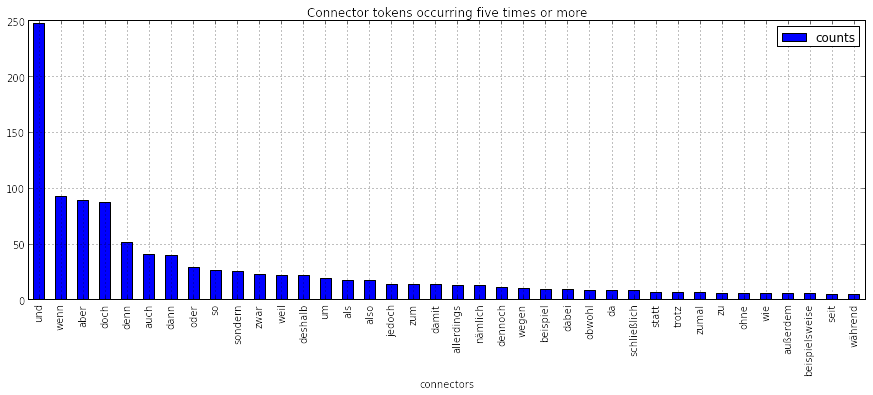

In [40]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 5

connector_token_df[connector_token_df.counts > 4].plot(kind='bar', x='connectors', title='Connector tokens occurring five times or more')

## Number of Connectors by Connector POS

In [41]:
TIGER_DIR = os.path.join(MAZ_ROOTDIR, 'syntax')

connector_pos = Counter()

for conano_file in conano_files:
    cdg = ConanoDocumentGraph(conano_file)
    maz_id = os.path.basename(conano_file).split('.')[0]
    tdg = TigerDocumentGraph(os.path.join(TIGER_DIR, maz_id+'.xml'))
    cdg.merge_graphs(tdg)
    for token_id in cdg.tokens:
        if 'conano:connective' in cdg.node[token_id]['layers']:
            connector_pos[cdg.node[token_id]['tiger:pos']] += 1

In [42]:
connector_pos_counts = sorted(connector_pos.iteritems(), key=itemgetter(1), reverse=True)
connector_pos_df = pd.DataFrame(connector_pos_counts, columns=['connector-pos', 'counts'])
connector_pos_df

,connector-pos,counts
0,KON,463
1,ADV,340
2,KOUS,188
3,PROAV,70
4,APPR,33
5,KOUI,29
6,APPRART,15
7,NN,11
8,PWAV,7
9,PTKZU,6


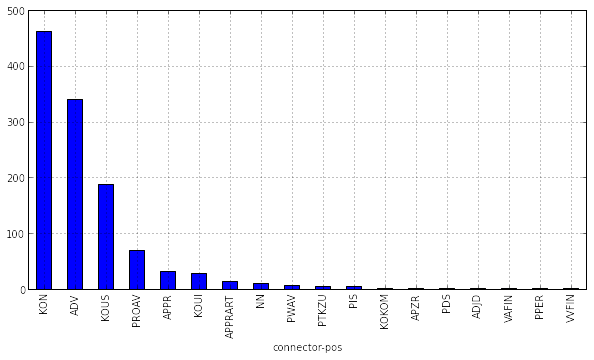

In [43]:
pylab.rcParams['figure.figsize'] = 10, 5
connector_pos_df.plot(kind='bar', x='connector-pos', y='counts')

## Total number of connectives

In [44]:
sum(connector_df['counts'])

1176

# Number of RST relations by type

In [45]:
RST_DIR = os.path.join(MAZ_ROOTDIR, 'rst')
rst_files = !ls $RST_DIR/*.rs3

In [46]:
all_rst_relations = Counter()

for rst_file in rst_files:
    rdg = RSTGraph(rst_file)
    for source, target, edge_attribs in select_edges_by(rdg, layer='rst:relation', data=True):
        all_rst_relations[edge_attribs['rst:relname']] += 1

In [47]:
rst_relations_count = sorted(all_rst_relations.iteritems(), key=itemgetter(1), reverse=True)
rst_relations_df = pd.DataFrame(rst_relations_count, columns=['RST relations', 'counts'])
rst_relations_df

,RST relations,counts
0,span,1890
1,joint,452
2,list,353
3,reason,267
4,conjunction,234
5,interpretation,231
6,elaboration,204
7,background,163
8,concession,125
9,antithesis,123


## RST relations by type (incl. generic 'span' relation)

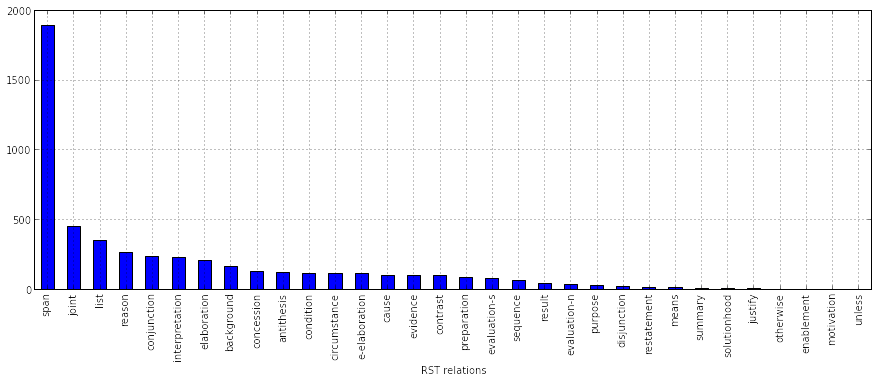

In [48]:
pylab.rcParams['figure.figsize'] = 15, 5
rst_relations_df.plot(kind='bar', x='RST relations', y='counts')

## RST relations by type (excl. generic 'span' relation)

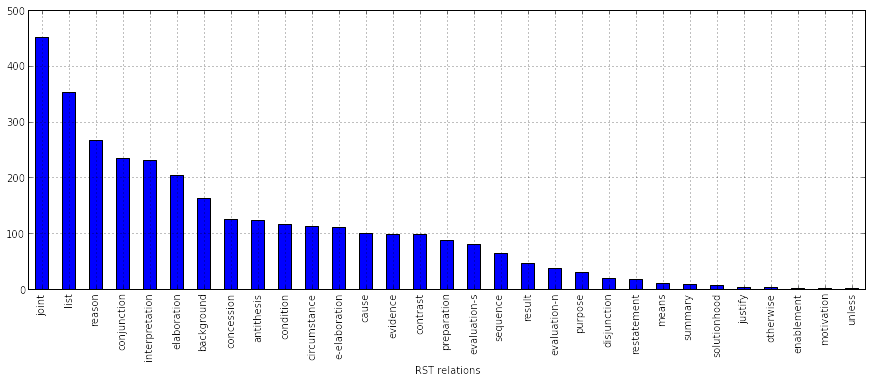

In [49]:
rst_relations_df[1:].plot(kind='bar', x='RST relations', y='counts')

## Total number of RST relations (incl. generic 'span' relation)

In [50]:
sum(rst_relations_df['counts'])

5101

## Total number of RST relations (excl. generic 'span' relation)

In [51]:
sum(rst_relations_df['counts'][1:])

3211

# Coreference counts

In [52]:
COREF_DIR = os.path.join(MAZ_ROOTDIR, 'coreference')
coref_files = !ls $COREF_DIR/*.mmax

## Number of binary coreference relations

In [53]:
binary_coref_relations = 0
binary_coref_relation_types = Counter()

for coref_file in coref_files:
    mdg = MMAXDocumentGraph(coref_file)
    for source, target, edge_attribs in select_edges_by(mdg, edge_type='points_to', data=True):
        binary_coref_relations += 1
        binary_coref_relation_types[edge_attribs['label']] += 1

### Total number of binary coreference relations

In [54]:
binary_coref_relations

1664

### Number of binary coreference relations by subtype

In [55]:
sorted(binary_coref_relation_types.iteritems(), key=itemgetter(1), reverse=True)

[('mmax:antecedent', 1446),
 ('mmaxsecmark:antecedent', 197),
 ('mmaxgroups:antecedent', 21)]

## Number of coreference chains

Please note that the number of coreference chains is somewhat skewed.
MMAX allows markables to point to more than one markable/target/antecedent.
This features was used when MAZ176 was annotated.

As an example, consider a coreference chain in which A points to B and B points
to both C and D (i.e. ``A -> B -> {C, D}``). The algorithm used here will interpret this as two separate
coreference chains (A-B-C and A-B-D).


cf. https://github.com/arne-cl/discoursegraphs/issues/40

In [56]:
coref_chains = 0

for coref_file in coref_files:
    mdg = MMAXDocumentGraph(coref_file)
    coref_chains += len(get_pointing_chains(mdg))

print coref_chains

934


## Number of connected coreference components

To avoid the abovementioned problem, we can calculate the
number of connected components from a graph constructed using all
binary coreference relations. In this setting, ``A -> B -> {C, D}``
will be counted as one connected component.

In [57]:
from networkx import Graph
from networkx.algorithms.components.connected import connected_components

coref_connected_components = 0

for coref_file in coref_files:
    coref_digraph = Graph()
    mdg = MMAXDocumentGraph(coref_file)
    for source, target, edge_attribs in select_edges_by(mdg, edge_type='points_to', data=True):
        coref_digraph.add_edge(source, target, edge_attribs)
    coref_connected_components += len(list(connected_components(coref_digraph)))
    
print coref_connected_components

890


# Reproducability information

In [58]:
%load_ext version_information
%version_information networkx, pandas

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.3 64bit [GCC 4.7.2]
IPython 2.1.0
OS Linux 3.5.0 51 generic x86_64 with LinuxMint 14 nadia
networkx 1.9
pandas 0.14.1
Mon Oct 13 13:28:03 2014 CEST

discoursegraphs git commit: 99b7cfb020d7893149aa75ed06af724b7698d784

pcc-annis-merged git commit: c4e87322af33850cada32f449170b91a2240a620